# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [99]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [16]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


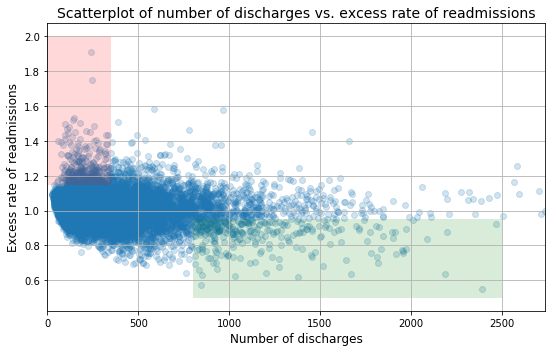

In [8]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

#### Validate Assestion "There is a significant correlation between hospital capacity (number of discharges) and readmission rates. "

I assume significant correlation means 

Co-Relation reference : http://sites.stat.psu.edu/~ajw13/stat200_upd/02_quantrel/02_quantrel_print.html

In [12]:
from scipy.stats.stats import pearsonr
pearsonr(x, y)

(-0.09309554287590441, 1.5022756426464526e-23)

<p> Except the non-negitive nature of pearson coefficient. does it convey any meaningful information ? </p>

<p> <b> Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.<b> </p>

## Hypothesis Test

H0 : There is no stastical signifncace on excess admissions b/w small hospitals and large hosptitals. <br>
HA : There is a significance.
    
$\alpha$ = .01. 

In [27]:
clean_hospital_read_df.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

In [44]:
hsp_ls_100 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] <  100] 
print("No of hospitals %s" %len(hsp_ls_100))

hsp_gt_1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >=  1000] 
print("No of hospitals %s" %len(hsp_gt_1000))

No of hospitals 1269
No of hospitals 464


Mean for hospitals with less than 300 discharges 1.0142382121807467
Standard Deviation for hospitals with less than 300 discharges 0.08247145651495592


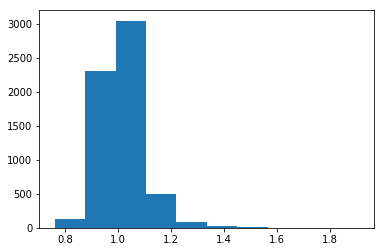

In [41]:
plt.hist(hsp_ls_100['Excess Readmission Ratio'].dropna())

print("Mean for hospitals with less than 100 discharges %s" % np.mean(hsp_ls_100['Excess Readmission Ratio'].dropna()))
print("Standard Deviation for hospitals with less than 100 discharges %s" % np.std(hsp_ls_100['Excess Readmission Ratio'].dropna()))

Mean for hospitals with greater than 1000 discharges 0.9783342672413794
Standard Deviation for hospitals with greater than 1000 discharges 0.1197484402132854


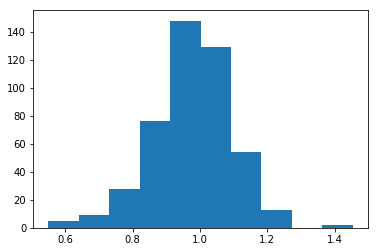

In [45]:
plt.hist(hsp_gt_1000['Excess Readmission Ratio'].dropna())

print("Mean for hospitals with greater than 1000 discharges %s" % np.mean(hsp_gt_1000['Excess Readmission Ratio'].dropna()))
print("Standard Deviation for hospitals with greater than 1000 discharges %s" % np.std(hsp_gt_1000['Excess Readmission Ratio'].dropna()))

H0 : Mean difference b/w mu0 - mu1 is zerp <br>
HA : mean difference is non zero.

In [60]:
# perform T test on hsp_ls_100 and hsp_gt_1000 distributions.
from scipy import stats
test_result = scipy.stats.ttest_ind(hsp_gt_1000['Excess Readmission Ratio'].dropna(),hsp_ls_100['Excess Readmission Ratio'].dropna())

In [52]:
# by Careful examination of t-statstic and p value, that indeed both hospitals with greater than 1000 and less than 100 discarges 
# are indeeed from different distribution and reject null hypothesis..

## statistical significance and practical significance

Statistical significance : How likely are observed results is by chance. 
<br>
Practical significance : How likely is observed results are signicant for end users.

refer. https://www.quora.com/What-are-the-differences-between-statistical-significance-and-practical-significance

In [87]:
hsp_ls_100_mean = np.mean(hsp_ls_100['Excess Readmission Ratio'].dropna())
hsp_gt_1000_meam = np.mean(hsp_gt_1000['Excess Readmission Ratio'].dropna())


hsp_ls_100_len = len(hsp_ls_100['Excess Readmission Ratio'].dropna())
hsp_gt_1000_len = len(hsp_gt_1000['Excess Readmission Ratio'].dropna())

hsp_ls_100_std = np.var(hsp_ls_100['Excess Readmission Ratio'].dropna())
hsp_gt_1000_std = np.var(hsp_gt_1000['Excess Readmission Ratio'].dropna())

sp = np.sqrt(((hsp_ls_100_len - 1) * hsp_ls_100_std)  + ((hsp_gt_1000_len - 1) * hsp_gt_1000_std ) \
      / (hsp_ls_100_len + hsp_gt_1000_len - 1))
 
# calculate confidence interval.
(hsp_ls_100_mean - hsp_gt_1000_meam) + ((test_result.statistic * sp) * (np.sqrt(1/hsp_ls_100_len + 1/hsp_gt_1000_std)))

-167.97791032018102

In [88]:
(hsp_ls_100_mean - hsp_gt_1000_meam) - ((test_result.statistic * sp) * 

168.06647848603495

In [ ]:
? does this providfe 

In [96]:
clean_hospital_read_df_readmin_discge =  clean_hospital_read_df[['Excess Readmission Ratio', 'Number of Discharges']].dropna()

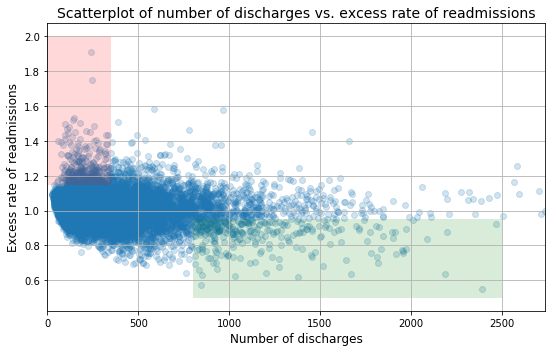

In [102]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

<b> What are the advantages and disadvantages of using this plot to convey information?
<p> 
    <b> Advantages </b> 
+ This provides overall picture. 
    <br> <b> Disadvatage </b>
+ Expected Readmission Rate doesnt give a clear picture of b/w no of discharges and expected readmission.
</p>

In [109]:
clean_hospital_read_df.iloc[900]

Hospital Name                 LOVELACE WESTSIDE HOSPITAL
Provider Number                                   320074
State                                                 NM
Measure Name                            READM-30-PN-HRRP
Number of Discharges                                  87
Footnote                                             NaN
Excess Readmission Ratio                          0.9814
Predicted Readmission Rate                            15
Expected Readmission Rate                           15.3
Number of Readmissions                                12
Start Date                                    07/01/2010
End Date                                      06/30/2013
Name: 8061, dtype: object

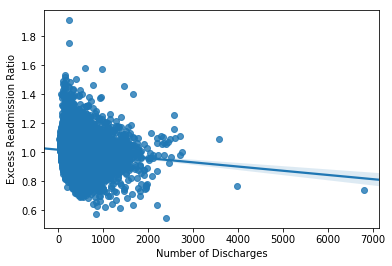

In [100]:
import seaborn as sns
sns.regplot(x="Number of Discharges", y="Excess Readmission Ratio", data=clean_hospital_read_df_readmin_discge);

In [ ]:
# As can be interpreted from above plot as no of discharges increase we see a decline in Excess admission ratio.  